# Ejemplo simple de predicción con dataset de enfermedades de corazón
En este notebook se intenta predecir si una persona tendrá o no enfermedad de corazón. Esperemos que los datos que utilicemos también sean faciles de manejar...

Se ha realizado la predicción con **Regresión Logística**.

Para visualizar los datos y probar los distintos hiperparámetros de los algoritmos es preferible utilizar notebooks, ya que así es más facil de programar los modelos.
Cuando ya tegamos los modelos, podemos copiar y pegar (*Con mucho cuidado!!!*) el código del notebook en Flask.

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from pylab import rcParams
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

## 1. Lectura de datos

In [2]:
df = pd.read_csv('heart.csv')

## 2. Visualización de datos

In [3]:
df.shape

(918, 12)

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

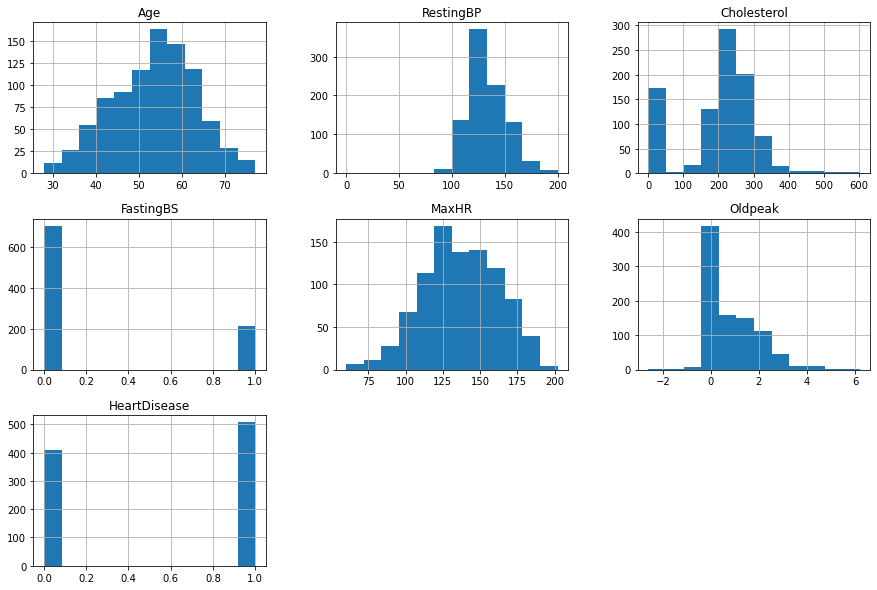

In [6]:
df.hist(bins=df.shape[1], figsize=(15,10))

## 3. Preparación de datos
Aparte de esto se tienen que hacer más cosas

In [7]:
df = pd.read_csv('heart.csv')

# Definición de transformación de strings categóricos en números
def df_categorical_to_encoded(df):
    for column in df:
        if df[column].dtypes == object:
            label_encoder = LabelEncoder()
            categorical_Encoded = label_encoder.fit_transform(df[column])
            #categorical_Encoded = categorical_Encoded.reshape(len(categorical_Encoded), 1) # Horizontal data to vertical
            df[column] = categorical_Encoded
            #one_hot_encoder = OneHotEncoder(sparse=False)
            #categorical_OneHotEncoded = one_hot_encoder.fit_transform(categorical_Encoded)
            #df[column] = categorical_OneHotEncoded.tolist()

## 4. Entrenamiento del modelo con Regresión Logística

In [8]:
# Definición del modelo
def train_model_with_logistic_regression(X_train, y_train):
    logistic_regression = LogisticRegression(C=1.0, penalty='l2', random_state=1, solver='newton-cg')
    logistic_regression.fit(X_train, y_train)
    return logistic_regression

# Separación de datos de entrenamiento y datos de test
df_categorical_to_encoded(df)
y = df['HeartDisease'] # y as HeartDisease
X = df.drop('HeartDisease', axis=1) # axis=1 -> we drop the column HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0)

# Aplicamos modelo
model = train_model_with_logistic_regression(X_train, y_train)

### 4.1. Resultados sobre datos de entrenamiento

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       370
           1       0.86      0.88      0.87       456

    accuracy                           0.85       826
   macro avg       0.85      0.85      0.85       826
weighted avg       0.85      0.85      0.85       826



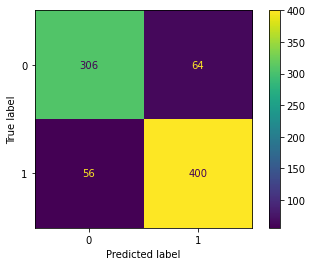

In [9]:
plot_confusion_matrix(model, X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))

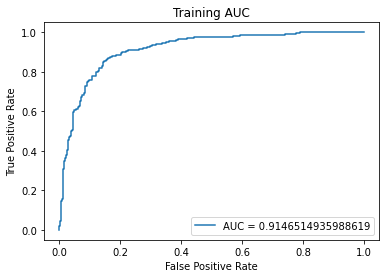

In [10]:
y_predict_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = roc_curve(y_train, y_predict_proba)
auc = roc_auc_score(y_train, y_predict_proba)

plt.plot(fpr,tpr, label='AUC = ' + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('Training AUC')
plt.show()

### 4.2. Resultados sobre datos de test

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.88      0.94      0.91        52

    accuracy                           0.89        92
   macro avg       0.90      0.88      0.89        92
weighted avg       0.89      0.89      0.89        92



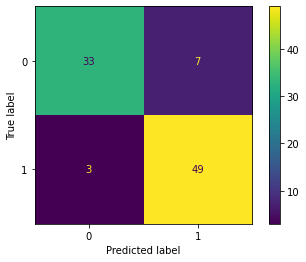

In [11]:
plot_confusion_matrix(model, X_test, y_test)
print(classification_report(y_test, model.predict(X_test)))

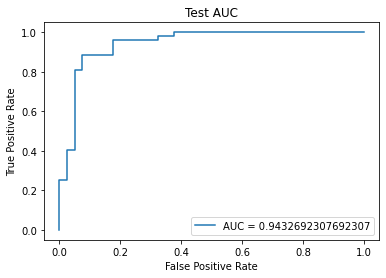

In [12]:
y_predict_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_proba)
auc = roc_auc_score(y_test, y_predict_proba)

plt.plot(fpr,tpr, label='AUC = ' + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('Test AUC')
plt.show()